In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor


In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.inspection import permutation_importance

In [3]:
def naive_roc_auc_score(y_true, y_pred):
  
  y_true = y_true.to_numpy()
  
  num_same_sign = 0
  num_pairs = 0
  
  for a in range(len(y_true)):
    for b in range(len(y_true)):
      if y_true[a] > y_true[b]:
        num_pairs += 1
        if y_pred[a] > y_pred[b]:
          num_same_sign += 1
        elif y_pred[a] == y_pred[b]:
          num_same_sign += .5
        
  return num_same_sign / num_pairs

from sklearn.metrics import make_scorer

score = make_scorer(naive_roc_auc_score, greater_is_better=True)

In [4]:
data = pd.read_csv('NF_Descriptors.csv')
data = data.dropna()
features = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = features.columns

In [5]:
pearsoncorr = features.corr(method='pearson')
pearsoncorr

,Molecular Weight,Heavy Atom Molecular Weight,Max Absolute Partial Charge,Max Partial Charge,Min Abs Partial Charge,Min Partial Charge,Radical Electrons,Valence Electrons,NHOH Count,NO Count,...,Rotatable Bonds,Saturated Carbocycles,Saturated Heterocycles,H Count,C Count,N Count,F Count,Halogen Count,Double Bonds,Triple Bonds
Molecular Weight,1.000000,0.998325,0.012849,0.039078,0.042157,-0.012042,NaN,0.952838,0.005999,0.219365,...,0.305101,NaN,0.107306,0.426408,0.790041,0.081821,0.123967,0.123967,0.249662,0.112409
Heavy Atom Molecular Weight,0.998325,1.000000,0.005946,0.044270,0.045267,-0.003950,NaN,0.941842,0.008246,0.219879,...,0.295909,NaN,0.089544,0.373361,0.765483,0.086109,0.150368,0.150368,0.235429,0.130393
Max Absolute Partial Charge,0.012849,0.005946,1.000000,0.444207,0.527846,-0.956583,NaN,0.046565,0.287333,0.154128,...,0.302343,NaN,0.155589,0.113072,-0.054376,-0.367381,-0.106569,-0.106569,0.162574,-0.170380
Max Partial Charge,0.039078,0.044270,0.444207,1.000000,0.922875,-0.303120,NaN,0.123224,0.307632,0.408146,...,0.113257,NaN,0.263129,-0.065539,-0.155486,-0.065372,0.171080,0.171080,0.379322,-0.202746
Min Abs Partial Charge,0.042157,0.045267,0.527846,0.922875,1.000000,-0.493775,NaN,0.124476,0.387319,0.435232,...,0.202700,NaN,0.227159,-0.031748,-0.127076,-0.118840,0.050502,0.050502,0.374619,-0.213491
Min Partial Charge,-0.012042,-0.003950,-0.956583,-0.303120,-0.493775,1.000000,NaN,-0.037501,-0.305443,-0.140455,...,-0.335975,NaN,-0.104176,-0.131321,0.021928,0.372549,0.192478,0.192478,-0.127023,0.154089
Radical Electrons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valence Electrons,0.952838,0.941842,0.046565,0.123224,0.124476,-0.037501,NaN,1.000000,0.045670,0.352893,...,0.353999,NaN,0.153169,0.553250,0.849055,0.166972,0.117076,0.117076,0.370833,0.054600
NHOH Count,0.005999,0.008246,0.287333,0.307632,0.387319,-0.305443,NaN,0.045670,1.000000,0.205889,...,0.334357,NaN,-0.126816,-0.032726,-0.026647,-0.143067,-0.069335,-0.069335,0.100826,-0.111802
NO Count,0.219365,0.219879,0.154128,0.408146,0.435232,-0.140455,NaN,0.352893,0.205889,1.000000,...,0.260634,NaN,0.281761,0.079758,0.040083,0.657262,-0.266024,-0.266024,0.463367,0.037573


<AxesSubplot:>

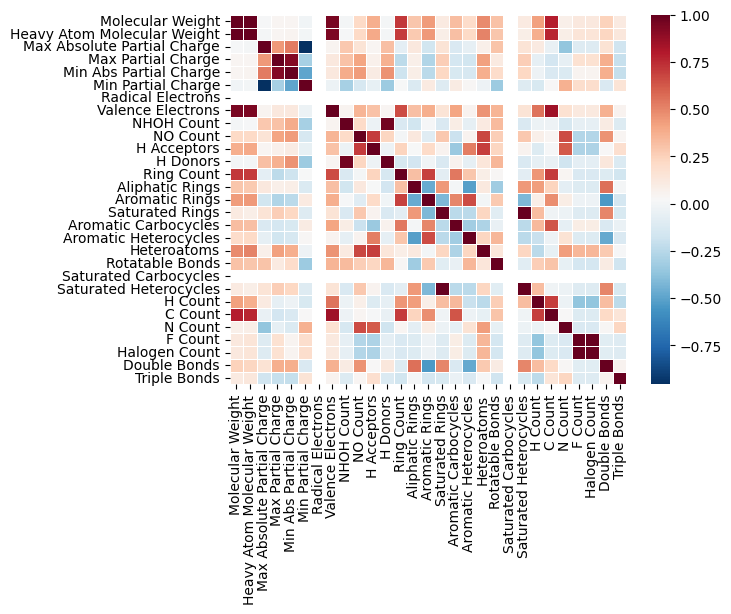

In [6]:
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=False,
            linewidth=0.5)

In [7]:

data = pd.read_csv('NF_Descriptors.csv')
data = data.dropna()
y = data['LUMO_calc']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [8]:

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              LUMO_calc   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          1.192e+05
Date:                Mon, 10 Jul 2023   Prob (F-statistic):                        0.00
Time:                        11:09:02   Log-Likelihood:                         -20667.
No. Observations:               41004   AIC:                                  4.138e+04
Df Residuals:                   40983   BIC:                                  4.156e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight                0.0101      0.002      5.181      0.000       0.006       0.014
Heavy Atom Molecular Weight    -0.0238      0.001    -18.441      0.000      -0.026      -0.021
Max Absolute Partial Charge  -261.7306     74.728     -3.502      0.000    -408.199    -115.263
Max Partial Charge            258.5518     74.728      3.460      0.001     112.084     405.020
Min Abs Partial Charge       -260.5757     74.728     -3.487      0.000    -407.044    -114.108
Min Partial Charge           -259.2983     74.728     -3.470      0.001    -405.766    -112.831
Radical Electrons            6.339e-10   1.82e-10      3.480      0.001    2.77e-10    9.91e-10
Valence Electrons               0.0325      0.006      5.533      0.000       0.021       0.044
NHOH Count                      0.0563      0.010      5.438      0.000       0.036       0.077
NO Count                       -0.0805      0.012     -6.957      0.000      -0.103      -0.058
H Acceptors                     0.1670      0.004     39.885      0.000       0.159       0.175
H Donors                        0.0605      0.013      4.650      0.000       0.035       0.086
Ring Count                      0.0826      0.004     19.306      0.000       0.074       0.091
Aliphatic Rings                 0.0666      0.003     25.805      0.000       0.062       0.072
Aromatic Rings                  0.0160      0.003      5.070      0.000       0.010       0.022
Saturated Rings                 0.0356      0.003     11.314      0.000       0.029       0.042
Aromatic Carbocycles            0.0175      0.003      6.148      0.000       0.012       0.023
Aromatic Heterocycles          -0.0015      0.002     -0.797      0.426      -0.005       0.002
Heteroatoms                    -0.0308      0.012     -2.548      0.011      -0.054      -0.007
Rotatable Bonds                 0.0879      0.003     25.836      0.000       0.081       0.095
Saturated Carbocycles        8.495e-14   2.44e-14      3.476      0.001     3.7e-14    1.33e-13
Saturated Heterocycles          0.0356      0.003     11.314      0.000       0.029       0.042
H Count                         0.0337      0.003     10.507      0.000       0.027       0.040
C Count                        -0.0579      0.017     -3.497      0.000      -0.090      -0.025
N Count                        -0.1794      0.005    -37.821      0.000      -0.189      -0.170
F Count                         0.0306      0.007      4.177      0.000       0.016       0.045
Halogen Count                   0.0306      0.007      4.177      0.000       0.016       0.045
Double Bonds                   -0.0688      0.002    -28.377      0.000      -0.074      -0.064
Triple B

In [9]:
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              LUMO_calc   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          1.252e+05
Date:                Mon, 10 Jul 2023   Prob (F-statistic):                        0.00
Time:                        11:09:03   Log-Likelihood:                         -20668.
No. Observations:               41004   AIC:                                  4.138e+04
Df Residuals:                   40984   BIC:                                  4.155e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight                0.0097      0.002      5.255      0.000       0.006       0.013
Heavy Atom Molecular Weight    -0.0237      0.001    -18.596      0.000      -0.026      -0.021
Max Absolute Partial Charge  -261.8538     74.727     -3.504      0.000    -408.320    -115.387
Max Partial Charge            258.6765     74.727      3.462      0.001     112.210     405.143
Min Abs Partial Charge       -260.6955     74.727     -3.489      0.000    -407.162    -114.229
Min Partial Charge           -259.4171     74.727     -3.472      0.001    -405.883    -112.951
Radical Electrons            1.825e-09   5.24e-10      3.481      0.000    7.98e-10    2.85e-09
Valence Electrons               0.0347      0.005      7.020      0.000       0.025       0.044
NHOH Count                      0.0565      0.010      5.455      0.000       0.036       0.077
NO Count                       -0.0847      0.010     -8.700      0.000      -0.104      -0.066
H Acceptors                     0.1664      0.004     40.612      0.000       0.158       0.174
H Donors                        0.0602      0.013      4.629      0.000       0.035       0.086
Ring Count                      0.0851      0.002     41.900      0.000       0.081       0.089
Aliphatic Rings                 0.0673      0.002     28.220      0.000       0.063       0.072
Aromatic Rings                  0.0179      0.001     11.921      0.000       0.015       0.021
Saturated Rings                 0.0358      0.003     11.393      0.000       0.030       0.042
Aromatic Carbocycles            0.0187      0.002      8.703      0.000       0.015       0.023
Aromatic Heterocycles          -0.0009      0.002     -0.529      0.597      -0.004       0.002
Heteroatoms                    -0.0347      0.011     -3.274      0.001      -0.056      -0.014
Rotatable Bonds                 0.0893      0.003     32.886      0.000       0.084       0.095
Saturated Carbocycles       -1.155e-13   3.32e-14     -3.481      0.000   -1.81e-13   -5.05e-14
Saturated Heterocycles          0.0358      0.003     11.393      0.000       0.030       0.042
H Count                         0.0331      0.003     10.720      0.000       0.027       0.039
C Count                        -0.0650      0.013     -5.053      0.000      -0.090      -0.040
N Count                        -0.1781      0.004    -40.841      0.000      -0.187      -0.170
F Count                         0.0283      0.007      4.350      0.000       0.016       0.041
Halogen Count                   0.0283      0.007      4.350      0.000       0.016       0.041
Double Bonds                   -0.0680      0.002    -32.667      0.000      -0.072      -0.064
========

In [10]:
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              LUMO_calc   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          1.252e+05
Date:                Mon, 10 Jul 2023   Prob (F-statistic):                        0.00
Time:                        11:09:03   Log-Likelihood:                         -20668.
No. Observations:               41004   AIC:                                  4.138e+04
Df Residuals:                   40984   BIC:                                  4.155e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight                0.0097      0.002      5.255      0.000       0.006       0.013
Heavy Atom Molecular Weight    -0.0237      0.001    -18.596      0.000      -0.026      -0.021
Max Absolute Partial Charge  -261.8538     74.727     -3.504      0.000    -408.320    -115.387
Max Partial Charge            258.6765     74.727      3.462      0.001     112.210     405.143
Min Abs Partial Charge       -260.6955     74.727     -3.489      0.000    -407.162    -114.229
Min Partial Charge           -259.4171     74.727     -3.472      0.001    -405.883    -112.951
Radical Electrons           -2.813e-09   8.08e-10     -3.481      0.000    -4.4e-09   -1.23e-09
Valence Electrons               0.0347      0.005      7.020      0.000       0.025       0.044
NHOH Count                      0.0565      0.010      5.455      0.000       0.036       0.077
NO Count                       -0.0847      0.010     -8.700      0.000      -0.104      -0.066
H Acceptors                     0.1664      0.004     40.612      0.000       0.158       0.174
H Donors                        0.0602      0.013      4.629      0.000       0.035       0.086
Ring Count                      0.0848      0.002     38.621      0.000       0.081       0.089
Aliphatic Rings                 0.0675      0.002     28.467      0.000       0.063       0.072
Aromatic Rings                  0.0173      0.002      9.195      0.000       0.014       0.021
Saturated Rings                 0.0358      0.003     11.393      0.000       0.030       0.042
Aromatic Carbocycles            0.0196      0.003      5.606      0.000       0.013       0.026
Heteroatoms                    -0.0347      0.011     -3.274      0.001      -0.056      -0.014
Rotatable Bonds                 0.0893      0.003     32.886      0.000       0.084       0.095
Saturated Carbocycles       -4.805e-14   1.38e-14     -3.481      0.000   -7.51e-14    -2.1e-14
Saturated Heterocycles          0.0358      0.003     11.393      0.000       0.030       0.042
H Count                         0.0331      0.003     10.720      0.000       0.027       0.039
C Count                        -0.0650      0.013     -5.053      0.000      -0.090      -0.040
N Count                        -0.1781      0.004    -40.841      0.000      -0.187      -0.170
F Count                         0.0283      0.007      4.350      0.000       0.016       0.041
Halogen Count                   0.0283      0.007      4.350      0.000       0.016       0.041
Double Bonds                   -0.0680      0.002    -32.667      0.000      -0.072      -0.064
==============================================================================
Omnibus:                 

In [11]:
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              LUMO_calc   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          1.252e+05
Date:                Mon, 10 Jul 2023   Prob (F-statistic):                        0.00
Time:                        11:09:03   Log-Likelihood:                         -20668.
No. Observations:               41004   AIC:                                  4.138e+04
Df Residuals:                   40984   BIC:                                  4.155e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight                0.0097      0.002      5.255      0.000       0.006       0.013
Heavy Atom Molecular Weight    -0.0237      0.001    -18.596      0.000      -0.026      -0.021
Max Absolute Partial Charge  -261.8538     74.727     -3.504      0.000    -408.320    -115.387
Max Partial Charge            258.6765     74.727      3.462      0.001     112.210     405.143
Min Abs Partial Charge       -260.6955     74.727     -3.489      0.000    -407.162    -114.229
Min Partial Charge           -259.4171     74.727     -3.472      0.001    -405.883    -112.951
Valence Electrons               0.0347      0.005      7.020      0.000       0.025       0.044
NHOH Count                      0.0565      0.010      5.455      0.000       0.036       0.077
NO Count                       -0.0847      0.010     -8.700      0.000      -0.104      -0.066
H Acceptors                     0.1664      0.004     40.612      0.000       0.158       0.174
H Donors                        0.0602      0.013      4.629      0.000       0.035       0.086
Ring Count                      0.0851      0.002     41.900      0.000       0.081       0.089
Aliphatic Rings                 0.0673      0.002     28.220      0.000       0.063       0.072
Aromatic Rings                  0.0179      0.001     11.921      0.000       0.015       0.021
Saturated Rings                 0.0358      0.003     11.393      0.000       0.030       0.042
Aromatic Carbocycles            0.0187      0.002      8.703      0.000       0.015       0.023
Aromatic Heterocycles          -0.0009      0.002     -0.529      0.597      -0.004       0.002
Heteroatoms                    -0.0347      0.011     -3.274      0.001      -0.056      -0.014
Rotatable Bonds                 0.0893      0.003     32.886      0.000       0.084       0.095
Saturated Heterocycles          0.0358      0.003     11.393      0.000       0.030       0.042
H Count                         0.0331      0.003     10.720      0.000       0.027       0.039
C Count                        -0.0650      0.013     -5.053      0.000      -0.090      -0.040
N Count                        -0.1781      0.004    -40.841      0.000      -0.187      -0.170
F Count                         0.0283      0.007      4.350      0.000       0.016       0.041
Halogen Count                   0.0283      0.007      4.350      0.000       0.016       0.041
Double Bonds                   -0.0680      0.002    -32.667      0.000      -0.072      -0.064
==============================================================================
Omnibus:                      259.984   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Ja

In [12]:
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              LUMO_calc   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          1.252e+05
Date:                Mon, 10 Jul 2023   Prob (F-statistic):                        0.00
Time:                        11:09:04   Log-Likelihood:                         -20668.
No. Observations:               41004   AIC:                                  4.138e+04
Df Residuals:                   40984   BIC:                                  4.155e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight                0.0097      0.002      5.255      0.000       0.006       0.013
Heavy Atom Molecular Weight    -0.0237      0.001    -18.596      0.000      -0.026      -0.021
Max Absolute Partial Charge  -261.8538     74.727     -3.504      0.000    -408.320    -115.387
Max Partial Charge            258.6765     74.727      3.462      0.001     112.210     405.143
Min Abs Partial Charge       -260.6955     74.727     -3.489      0.000    -407.162    -114.229
Min Partial Charge           -259.4171     74.727     -3.472      0.001    -405.883    -112.951
Radical Electrons           -2.813e-09   8.08e-10     -3.481      0.000    -4.4e-09   -1.23e-09
Valence Electrons               0.0347      0.005      7.020      0.000       0.025       0.044
NHOH Count                      0.0565      0.010      5.455      0.000       0.036       0.077
NO Count                       -0.0847      0.010     -8.700      0.000      -0.104      -0.066
H Acceptors                     0.1664      0.004     40.612      0.000       0.158       0.174
H Donors                        0.0602      0.013      4.629      0.000       0.035       0.086
Ring Count                      0.0848      0.002     38.621      0.000       0.081       0.089
Aliphatic Rings                 0.0675      0.002     28.467      0.000       0.063       0.072
Aromatic Rings                  0.0173      0.002      9.195      0.000       0.014       0.021
Saturated Rings                 0.0358      0.003     11.393      0.000       0.030       0.042
Aromatic Carbocycles            0.0196      0.003      5.606      0.000       0.013       0.026
Heteroatoms                    -0.0347      0.011     -3.274      0.001      -0.056      -0.014
Rotatable Bonds                 0.0893      0.003     32.886      0.000       0.084       0.095
Saturated Carbocycles       -4.805e-14   1.38e-14     -3.481      0.000   -7.51e-14    -2.1e-14
Saturated Heterocycles          0.0358      0.003     11.393      0.000       0.030       0.042
H Count                         0.0331      0.003     10.720      0.000       0.027       0.039
C Count                        -0.0650      0.013     -5.053      0.000      -0.090      -0.040
N Count                        -0.1781      0.004    -40.841      0.000      -0.187      -0.170
F Count                         0.0283      0.007      4.350      0.000       0.016       0.041
Halogen Count                   0.0283      0.007      4.350      0.000       0.016       0.041
Double Bonds                   -0.0680      0.002    -32.667      0.000      -0.072      -0.064
==============================================================================
Omnibus:                 

In [13]:

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(random_state=0)
grid_cv = GridSearchCV(rf, param_grid, scoring=score, n_jobs=-1, cv=cv).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))

KeyboardInterrupt: 

Text(0.5, 1.0, 'LUMO')

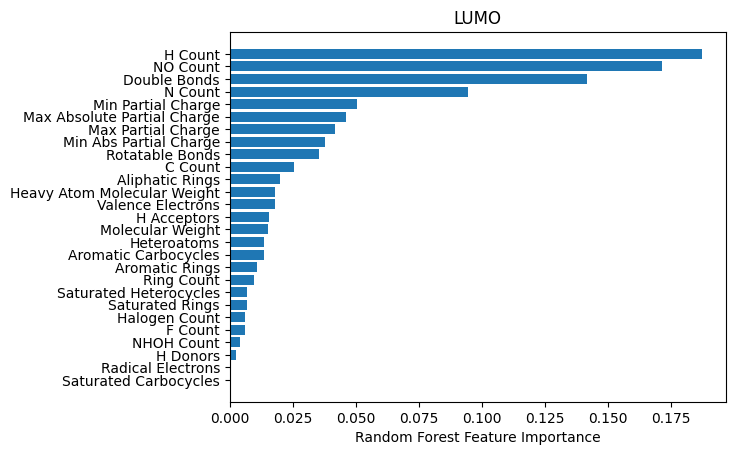

In [ ]:
rfr = RandomForestRegressor(random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("LUMO")

In [ ]:
# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

from sklearn.metrics import mean_squared_error

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

Mean Absolute Error: 0.15 degrees.
R2:  0.8632189209678922
MSE:  0.04070845329511291
RMSE:  0.20176335964469097


In [ ]:
r = permutation_importance(rfr, X_train, y_train,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{list_numerical[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

H Count 0.603 +/- 0.003
Double Bonds0.578 +/- 0.004
NO Count0.241 +/- 0.002
N Count 0.183 +/- 0.001
Rotatable Bonds0.083 +/- 0.001
Min Partial Charge0.068 +/- 0.000
Max Absolute Partial Charge0.065 +/- 0.001
C Count 0.049 +/- 0.000
Max Partial Charge0.048 +/- 0.000
Min Abs Partial Charge0.043 +/- 0.000
Aliphatic Rings0.038 +/- 0.000
Valence Electrons0.021 +/- 0.000
Aromatic Carbocycles0.020 +/- 0.000
Heavy Atom Molecular Weight0.019 +/- 0.000
Aromatic Rings0.017 +/- 0.000
H Acceptors0.017 +/- 0.000
Heteroatoms0.015 +/- 0.000
Molecular Weight0.013 +/- 0.000
Ring Count0.011 +/- 0.000
Halogen Count0.007 +/- 0.000
F Count 0.007 +/- 0.000
Saturated Heterocycles0.005 +/- 0.000
NHOH Count0.004 +/- 0.000
Saturated Rings0.004 +/- 0.000
H Donors0.002 +/- 0.000


In [ ]:
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Valence Electrons', 'NO Count',
         'H Acceptors','Ring Count', 'Aliphatic Rings', 'Aromatic Rings','Aromatic Carbocycles',
         'Heteroatoms', 'Rotatable Bonds', 'H Count',
         'C Count', 'N Count', 'Double Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              LUMO_calc   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.437e+05
Date:                Thu, 29 Jun 2023   Prob (F-statistic):                        0.00
Time:                        13:13:09   Log-Likelihood:                         -21162.
No. Observations:               41004   AIC:                                  4.236e+04
Df Residuals:                   40987   BIC:                                  4.250e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight                0.0118      0.001     12.986      0.000       0.010       0.014
Heavy Atom Molecular Weight    -0.0260      0.001    -22.203      0.000      -0.028      -0.024
Max Absolute Partial Charge  -269.4348     75.629     -3.563      0.000    -417.670    -121.200
Max Partial Charge            266.1626     75.629      3.519      0.000     117.928     414.397
Min Abs Partial Charge       -268.1125     75.629     -3.545      0.000    -416.347    -119.878
Min Partial Charge           -267.0532     75.629     -3.531      0.000    -415.288    -118.819
Valence Electrons               0.0280      0.003      9.084      0.000       0.022       0.034
NO Count                       -0.0897      0.005    -16.443      0.000      -0.100      -0.079
H Acceptors                     0.1156      0.004     32.244      0.000       0.109       0.123
Ring Count                      0.0715      0.002     33.615      0.000       0.067       0.076
Aliphatic Rings                 0.0607      0.002     26.115      0.000       0.056       0.065
Aromatic Rings                  0.0108      0.002      5.695      0.000       0.007       0.014
Aromatic Carbocycles            0.0412      0.003     11.935      0.000       0.034       0.048
Heteroatoms                     0.0728      0.027      2.742      0.006       0.021       0.125
Rotatable Bonds                 0.1041      0.003     40.823      0.000       0.099       0.109
H Count                         0.0374      0.002     18.326      0.000       0.033       0.041
C Count                        -0.0360      0.016     -2.287      0.022      -0.067      -0.005
N Count                        -0.1903      0.004    -46.980      0.000      -0.198      -0.182
Double Bonds                   -0.0777      0.002    -38.120      0.000      -0.082      -0.074
==============================================================================
Omnibus:                      383.018   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              519.678
Skew:                           0.133   Prob(JB):                    1.42e-113
Kurtosis:                       3.483   Cond. No.                     2.85e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.86e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(random_state=0)
grid_cv = GridSearchCV(rf, param_grid, scoring=score, n_jobs=-1, cv=cv).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))

Param for GS {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.8805770020900853
Train AUC ROC Score for GS:  0.9399762008244786
Test AUC ROC Score for GS:  0.8829968523369737


Text(0.5, 1.0, 'LUMO')

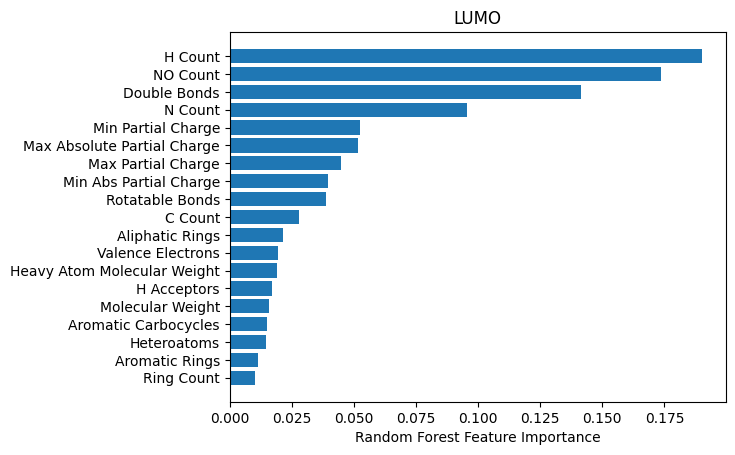

In [ ]:
rfr = RandomForestRegressor(random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("LUMO")

In [ ]:
# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

from sklearn.metrics import mean_squared_error

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

Mean Absolute Error: 0.16 degrees.
R2:  0.861460862716159
MSE:  0.041231682331886114
RMSE:  0.20305586012692692


In [ ]:
r = permutation_importance(rfr, X_train, y_train,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{list_numerical[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

H Count 0.618 +/- 0.003
Double Bonds0.576 +/- 0.004
NO Count0.265 +/- 0.002
N Count 0.189 +/- 0.001
Rotatable Bonds0.089 +/- 0.001
Max Absolute Partial Charge0.073 +/- 0.001
Min Partial Charge0.072 +/- 0.000
Max Partial Charge0.056 +/- 0.000
C Count 0.054 +/- 0.000
Min Abs Partial Charge0.046 +/- 0.000
Aliphatic Rings0.042 +/- 0.000
Aromatic Carbocycles0.024 +/- 0.000
Valence Electrons0.023 +/- 0.000
H Acceptors0.020 +/- 0.000
Heavy Atom Molecular Weight0.020 +/- 0.000
Aromatic Rings0.018 +/- 0.000
Heteroatoms0.016 +/- 0.000
Molecular Weight0.013 +/- 0.000
Ring Count0.012 +/- 0.000


In [ ]:
X = data.loc[:, ['Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Valence Electrons', 'NO Count',
         'H Acceptors','Ring Count', 'Aliphatic Rings', 'Aromatic Rings','Aromatic Carbocycles',
         'Heteroatoms', 'Rotatable Bonds', 'H Count',
         'C Count', 'N Count', 'Double Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              LUMO_calc   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.474e+05
Date:                Thu, 29 Jun 2023   Prob (F-statistic):                        0.00
Time:                        15:07:01   Log-Likelihood:                         -21880.
No. Observations:               41004   AIC:                                  4.379e+04
Df Residuals:                   40988   BIC:                                  4.393e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Max Absolute Partial Charge  -273.4673     76.965     -3.553      0.000    -424.321    -122.613
Max Partial Charge            270.3585     76.965      3.513      0.000     119.505     421.212
Min Abs Partial Charge       -272.6740     76.965     -3.543      0.000    -423.528    -121.820
Min Partial Charge           -271.3210     76.965     -3.525      0.000    -422.175    -120.467
Valence Electrons               0.1061      0.002     45.204      0.000       0.101       0.111
NO Count                        0.1003      0.002     43.737      0.000       0.096       0.105
H Acceptors                     0.0293      0.003     10.333      0.000       0.024       0.035
Ring Count                      0.0701      0.002     32.409      0.000       0.066       0.074
Aliphatic Rings                 0.0767      0.002     32.953      0.000       0.072       0.081
Aromatic Rings                 -0.0066      0.002     -3.512      0.000      -0.010      -0.003
Aromatic Carbocycles            0.0365      0.004     10.374      0.000       0.030       0.043
Heteroatoms                    -0.7481      0.016    -46.981      0.000      -0.779      -0.717
Rotatable Bonds                 0.1143      0.003     44.268      0.000       0.109       0.119
H Count                        -0.0277      0.002    -12.646      0.000      -0.032      -0.023
C Count                        -0.5164      0.010    -53.632      0.000      -0.535      -0.497
N Count                        -0.0633      0.002    -26.821      0.000      -0.068      -0.059
Double Bonds                   -0.1032      0.002    -52.658      0.000      -0.107      -0.099
==============================================================================
Omnibus:                      540.545   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              743.067
Skew:                           0.177   Prob(JB):                    4.42e-162
Kurtosis:                       3.557   Cond. No.                     3.27e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.27e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(random_state=0)
grid_cv = GridSearchCV(rf, param_grid, scoring=score, n_jobs=-1, cv=cv).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))

Param for GS {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.8810945378239382
Train AUC ROC Score for GS:  0.9401334421094723
Test AUC ROC Score for GS:  0.8833147782940873


Mean Absolute Error: 0.15 degrees.
R2:  0.8621928192996811
MSE:  0.04101383918716752
RMSE:  0.20251873786681449


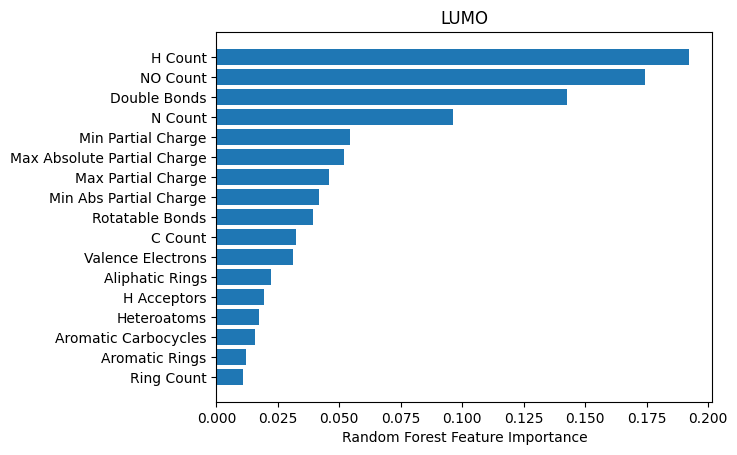

In [ ]:
rfr = RandomForestRegressor(random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("LUMO")

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

from sklearn.metrics import mean_squared_error

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

In [ ]:
r = permutation_importance(rfr, X_train, y_train,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{list_numerical[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

H Count 0.623 +/- 0.003
Double Bonds0.585 +/- 0.004
NO Count0.255 +/- 0.002
N Count 0.189 +/- 0.001
Rotatable Bonds0.092 +/- 0.001
Min Partial Charge0.077 +/- 0.000
Max Absolute Partial Charge0.070 +/- 0.001
C Count 0.067 +/- 0.000
Max Partial Charge0.055 +/- 0.000
Min Abs Partial Charge0.049 +/- 0.000
Valence Electrons0.048 +/- 0.000
Aliphatic Rings0.044 +/- 0.000
Aromatic Carbocycles0.026 +/- 0.000
H Acceptors0.024 +/- 0.000
Heteroatoms0.021 +/- 0.000
Aromatic Rings0.016 +/- 0.000
Ring Count0.012 +/- 0.000


In [ ]:
X = data.loc[:, ['Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Valence Electrons', 'NO Count',
         'Aliphatic Rings', 'Rotatable Bonds', 'H Count',
         'C Count', 'N Count', 'Double Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              LUMO_calc   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          1.788e+05
Date:                Thu, 29 Jun 2023   Prob (F-statistic):                        0.00
Time:                        16:45:47   Log-Likelihood:                         -23785.
No. Observations:               41004   AIC:                                  4.759e+04
Df Residuals:                   40992   BIC:                                  4.770e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Max Absolute Partial Charge  -258.1746     80.616     -3.203      0.001    -416.184    -100.165
Max Partial Charge            255.1418     80.616      3.165      0.002      97.133     413.151
Min Abs Partial Charge       -257.1216     80.616     -3.189      0.001    -415.131     -99.112
Min Partial Charge           -255.7683     80.616     -3.173      0.002    -413.777     -97.759
Valence Electrons              -0.0060      0.000    -29.495      0.000      -0.006      -0.006
NO Count                        0.0502      0.002     28.836      0.000       0.047       0.054
Aliphatic Rings                 0.0537      0.003     16.052      0.000       0.047       0.060
Rotatable Bonds                 0.0899      0.002     36.643      0.000       0.085       0.095
H Count                         0.0731      0.001    101.930      0.000       0.072       0.075
C Count                        -0.0424      0.001    -36.360      0.000      -0.045      -0.040
N Count                        -0.1680      0.002   -106.256      0.000      -0.171      -0.165
Double Bonds                   -0.1157      0.001    -81.951      0.000      -0.118      -0.113
==============================================================================
Omnibus:                      344.801   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              519.368
Skew:                           0.076   Prob(JB):                    1.66e-113
Kurtosis:                       3.530   Cond. No.                     1.37e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Mean Absolute Error: 0.16 degrees.
R2:  0.8597093995470011
MSE:  0.0417529485561644
RMSE:  0.20433538253607572


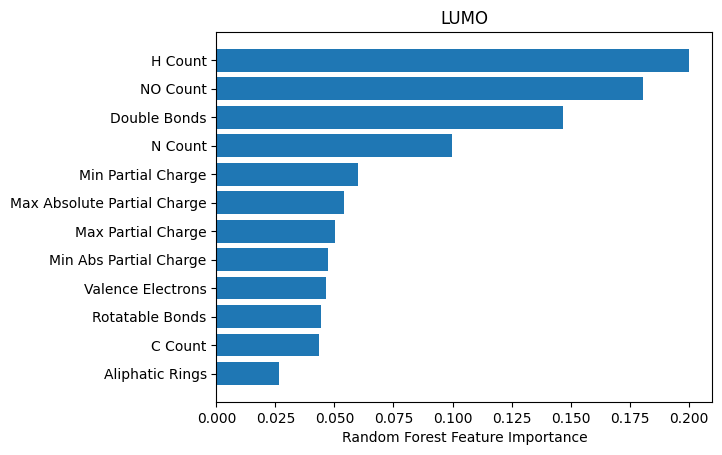

In [ ]:
rfr = RandomForestRegressor(random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("LUMO")

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

from sklearn.metrics import mean_squared_error

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

In [ ]:
r = permutation_importance(rfr, X_train, y_train,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{list_numerical[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

H Count 0.711 +/- 0.003
Double Bonds0.658 +/- 0.003
NO Count0.298 +/- 0.003
N Count 0.205 +/- 0.001
Rotatable Bonds0.111 +/- 0.001
C Count 0.097 +/- 0.001
Min Partial Charge0.083 +/- 0.000
Valence Electrons0.080 +/- 0.001
Max Absolute Partial Charge0.071 +/- 0.000
Max Partial Charge0.062 +/- 0.000
Min Abs Partial Charge0.057 +/- 0.000
Aliphatic Rings0.056 +/- 0.001


In [ ]:
X = data.loc[:, ['Max Absolute Partial Charge', 'Max Partial Charge', 'Min Partial Charge', 'Valence Electrons', 'NO Count', 'Rotatable Bonds', 'H Count',
         'C Count', 'N Count', 'Double Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              LUMO_calc   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          2.131e+05
Date:                Thu, 29 Jun 2023   Prob (F-statistic):                        0.00
Time:                        17:18:17   Log-Likelihood:                         -23919.
No. Observations:               41004   AIC:                                  4.786e+04
Df Residuals:                   40994   BIC:                                  4.794e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Max Absolute Partial Charge    -1.1151      0.104    -10.689      0.000      -1.320      -0.911
Max Partial Charge             -2.1651      0.044    -49.621      0.000      -2.251      -2.080
Min Partial Charge              1.1794      0.093     12.619      0.000       0.996       1.363
Valence Electrons              -0.0046      0.000    -24.954      0.000      -0.005      -0.004
NO Count                        0.0508      0.002     29.094      0.000       0.047       0.054
Rotatable Bonds                 0.0629      0.002     35.096      0.000       0.059       0.066
H Count                         0.0787      0.001    125.169      0.000       0.078       0.080
C Count                        -0.0487      0.001    -44.176      0.000      -0.051      -0.047
N Count                        -0.1721      0.002   -110.062      0.000      -0.175      -0.169
Double Bonds                   -0.1044      0.001    -85.058      0.000      -0.107      -0.102
==============================================================================
Omnibus:                      374.033   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              554.617
Skew:                           0.096   Prob(JB):                    3.69e-121
Kurtosis:                       3.537   Cond. No.                     1.19e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Mean Absolute Error: 0.16 degrees.
R2:  0.8567546824722689
MSE:  0.04263232429210789
RMSE:  0.20647596541028182


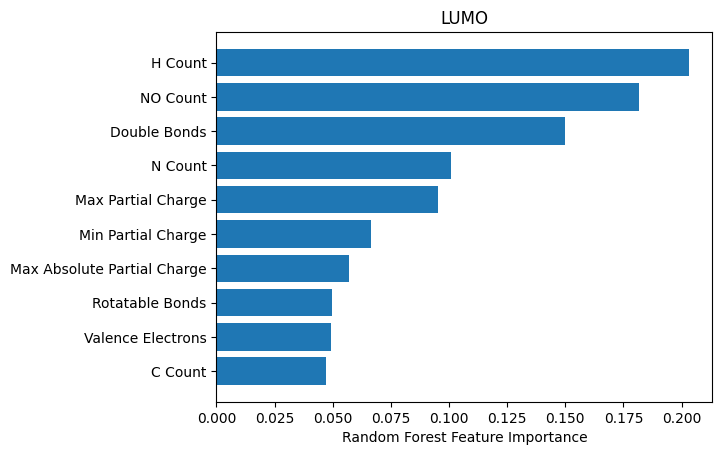

In [ ]:
rfr = RandomForestRegressor(random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("LUMO")

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

from sklearn.metrics import mean_squared_error

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

In [ ]:
r = permutation_importance(rfr, X_train, y_train,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{list_numerical[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

H Count 0.717 +/- 0.003
Double Bonds0.642 +/- 0.003
NO Count0.321 +/- 0.003
N Count 0.211 +/- 0.002
Max Partial Charge0.144 +/- 0.001
Rotatable Bonds0.126 +/- 0.001
C Count 0.112 +/- 0.001
Min Partial Charge0.095 +/- 0.001
Valence Electrons0.084 +/- 0.001
Max Absolute Partial Charge0.076 +/- 0.001


In [ ]:
X = data.loc[:, ['Max Partial Charge', 'Min Partial Charge', 'Valence Electrons', 'NO Count', 'Rotatable Bonds', 'H Count',
         'C Count', 'N Count', 'Double Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              LUMO_calc   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          2.362e+05
Date:                Thu, 29 Jun 2023   Prob (F-statistic):                        0.00
Time:                        17:33:43   Log-Likelihood:                         -23976.
No. Observations:               41004   AIC:                                  4.797e+04
Df Residuals:                   40995   BIC:                                  4.805e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Max Partial Charge    -2.4300      0.036    -67.569      0.000      -2.500      -2.359
Min Partial Charge     2.1435      0.025     87.460      0.000       2.095       2.192
Valence Electrons     -0.0049      0.000    -26.920      0.000      -0.005      -0.005
NO Count               0.0555      0.002     32.805      0.000       0.052       0.059
Rotatable Bonds        0.0633      0.002     35.315      0.000       0.060       0.067
H Count                0.0780      0.001    124.568      0.000       0.077       0.079
C Count               -0.0470      0.001    -43.008      0.000      -0.049      -0.045
N Count               -0.1752      0.002   -113.708      0.000      -0.178      -0.172
Double Bonds          -0.1047      0.001    -85.225      0.000      -0.107      -0.102
==============================================================================
Omnibus:                      374.295   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              533.829
Skew:                           0.112   Prob(JB):                    1.20e-116
Kurtosis:                       3.512   Cond. No.                     3.18e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Mean Absolute Error: 0.16 degrees.
R2:  0.8570200037723186
MSE:  0.042553360009710786
RMSE:  0.20628465771770518


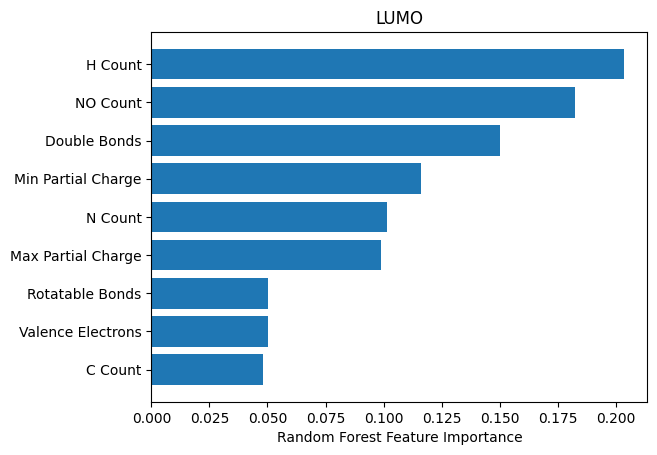

In [ ]:
rfr = RandomForestRegressor(random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("LUMO")

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

from sklearn.metrics import mean_squared_error

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

In [ ]:
r = permutation_importance(rfr, X_train, y_train,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{list_numerical[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

H Count 0.717 +/- 0.003
Double Bonds0.650 +/- 0.003
NO Count0.323 +/- 0.003
N Count 0.210 +/- 0.002
Min Partial Charge0.194 +/- 0.001
Max Partial Charge0.149 +/- 0.001
Rotatable Bonds0.127 +/- 0.001
C Count 0.113 +/- 0.001
Valence Electrons0.085 +/- 0.001


In [ ]:
X = data.loc[:, ['Max Partial Charge', 'Min Partial Charge', 'NO Count', 'Rotatable Bonds', 'H Count',
         'C Count', 'N Count', 'Double Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              LUMO_calc   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          2.610e+05
Date:                Thu, 29 Jun 2023   Prob (F-statistic):                        0.00
Time:                        17:41:13   Log-Likelihood:                         -24335.
No. Observations:               41004   AIC:                                  4.869e+04
Df Residuals:                   40996   BIC:                                  4.875e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Max Partial Charge    -2.8468      0.033    -86.940      0.000      -2.911      -2.783
Min Partial Charge     2.2222      0.025     90.530      0.000       2.174       2.270
NO Count               0.0448      0.002     27.026      0.000       0.042       0.048
Rotatable Bonds        0.0608      0.002     33.672      0.000       0.057       0.064
H Count                0.0823      0.001    134.584      0.000       0.081       0.083
C Count               -0.0732      0.000   -147.949      0.000      -0.074      -0.072
N Count               -0.1784      0.002   -115.134      0.000      -0.181      -0.175
Double Bonds          -0.1059      0.001    -85.549      0.000      -0.108      -0.104
==============================================================================
Omnibus:                      275.894   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              380.487
Skew:                           0.087   Prob(JB):                     2.39e-83
Kurtosis:                       3.439   Cond. No.                         511.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Mean Absolute Error: 0.16 degrees.
R2:  0.8545610136594376
MSE:  0.043285198688508345
RMSE:  0.20805095214516164


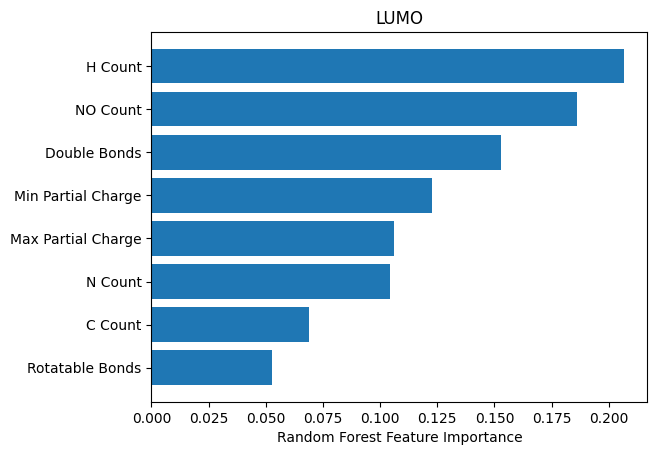

In [ ]:
rfr = RandomForestRegressor(random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("LUMO")

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

from sklearn.metrics import mean_squared_error

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

In [ ]:
r = permutation_importance(rfr, X_train, y_train,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{list_numerical[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

H Count 0.719 +/- 0.003
Double Bonds0.677 +/- 0.003
NO Count0.348 +/- 0.003
N Count 0.217 +/- 0.002
Min Partial Charge0.204 +/- 0.001
C Count 0.182 +/- 0.001
Max Partial Charge0.161 +/- 0.001
Rotatable Bonds0.137 +/- 0.001


In [ ]:
X = data.loc[:, ['Max Partial Charge', 'Min Partial Charge', 'NO Count', 'H Count',
         'C Count', 'N Count', 'Double Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              LUMO_calc   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          2.901e+05
Date:                Mon, 03 Jul 2023   Prob (F-statistic):                        0.00
Time:                        10:02:16   Log-Likelihood:                         -24894.
No. Observations:               41004   AIC:                                  4.980e+04
Df Residuals:                   40997   BIC:                                  4.986e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Max Partial Charge    -2.9302      0.033    -88.529      0.000      -2.995      -2.865
Min Partial Charge     2.0821      0.025     84.902      0.000       2.034       2.130
NO Count               0.0649      0.002     41.319      0.000       0.062       0.068
H Count                0.0830      0.001    134.001      0.000       0.082       0.084
C Count               -0.0682      0.000   -142.539      0.000      -0.069      -0.067
N Count               -0.1933      0.002   -128.374      0.000      -0.196      -0.190
Double Bonds          -0.1153      0.001    -94.307      0.000      -0.118      -0.113
==============================================================================
Omnibus:                      228.188   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              308.515
Skew:                           0.074   Prob(JB):                     1.02e-67
Kurtosis:                       3.399   Cond. No.                         504.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Mean Absolute Error: 0.16 degrees.
R2:  0.8448756026918411
MSE:  0.04616774723110189
RMSE:  0.21486681277270786


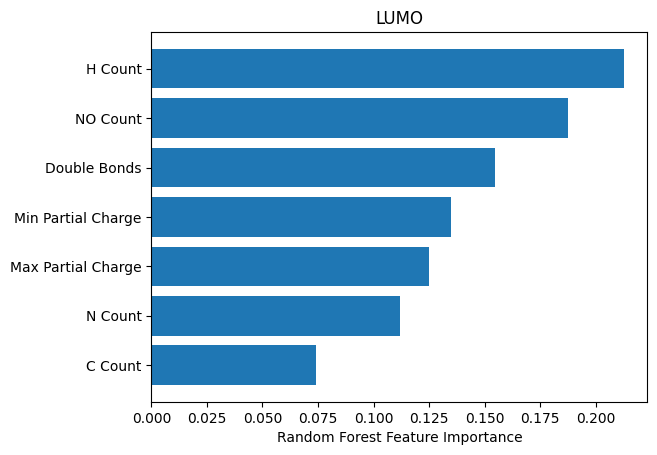

In [ ]:
rfr = RandomForestRegressor(random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("LUMO")

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

from sklearn.metrics import mean_squared_error

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

In [ ]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(random_state=0)
grid_cv = GridSearchCV(rf, param_grid, scoring=score, n_jobs=-1, cv=cv).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))

KeyboardInterrupt: 

Mean Absolute Error: 0.15 degrees.
R2:  0.8632189209678922
MSE:  0.04070845329511291
RMSE:  0.20176335964469097


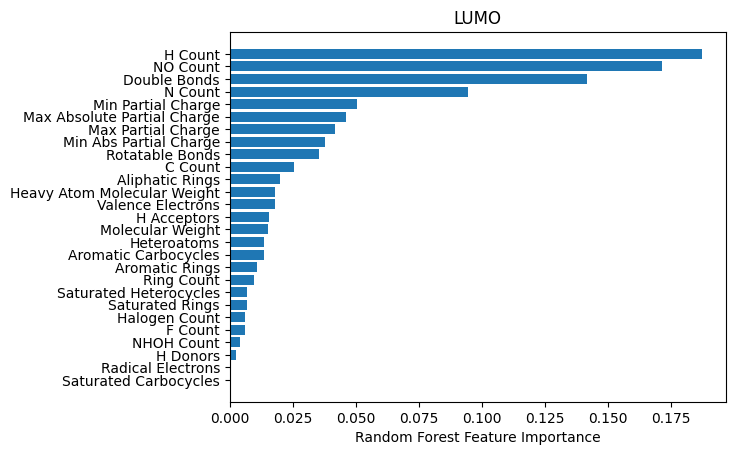

In [ ]:
rfr = RandomForestRegressor(random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("LUMO")

from sklearn.metrics import mean_squared_error

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

In [ ]:
X = data.loc[:, ['Max Absolute Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'H Count',
         'C Count', 'N Count', 'Halogen Count', 'Double Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

from sklearn.model_selection import GridSearchCV, RepeatedKFold

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(random_state=0)
grid_cv = GridSearchCV(rf, param_grid, scoring=score, n_jobs=-1, cv=cv).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))

Param for GS {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.8813329070668263
Train AUC ROC Score for GS:  0.9400203553542037
Test AUC ROC Score for GS:  0.883754893419715


Mean Absolute Error: 0.15 degrees.
R2:  0.863478177517304
MSE:  0.04063129398910461
RMSE:  0.20157205656812804


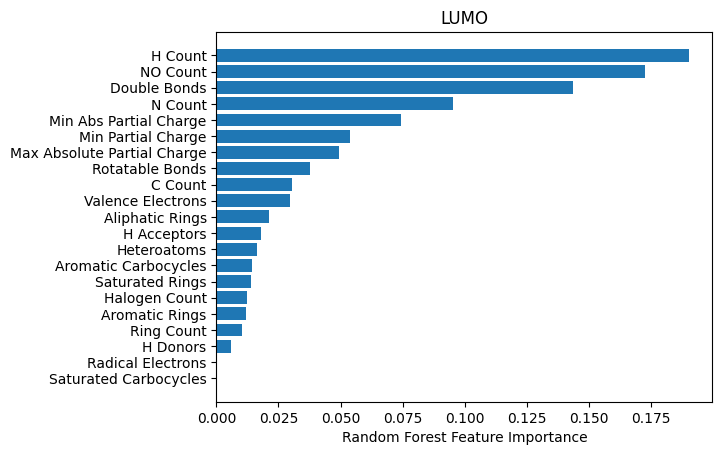

In [ ]:
rfr = RandomForestRegressor(random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("LUMO")

from sklearn.metrics import mean_squared_error

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

In [ ]:
data = pd.read_csv('NF_Descriptors.csv')
data = data.dropna()
y = data['HOMO_calc']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              HOMO_calc   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.328e+05
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                        0.00
Time:                        16:43:16   Log-Likelihood:                         -46206.
No. Observations:               41004   AIC:                                  9.245e+04
Df Residuals:                   40983   BIC:                                  9.263e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0724      0.004    -19.840      0.000      -0.080      -0.065
Heavy Atom Molecular Weight     0.0234      0.002      9.728      0.000       0.019       0.028
Max Absolute Partial Charge  -840.4259    139.307     -6.033      0.000   -1113.470    -567.382
Max Partial Charge            832.7733    139.306      5.978      0.000     559.730    1105.817
Min Abs Partial Charge       -838.5920    139.307     -6.020      0.000   -1111.636    -565.548
Min Partial Charge           -834.5849    139.306     -5.991      0.000   -1107.628    -561.542
Radical Electrons            2.039e-09    3.4e-10      6.005      0.000    1.37e-09     2.7e-09
Valence Electrons               0.3247      0.011     29.615      0.000       0.303       0.346
NHOH Count                      0.2650      0.019     13.731      0.000       0.227       0.303
NO Count                       -0.5947      0.022    -27.573      0.000      -0.637      -0.552
H Acceptors                     0.0967      0.008     12.388      0.000       0.081       0.112
H Donors                       -0.1622      0.024     -6.686      0.000      -0.210      -0.115
Ring Count                      0.2432      0.008     30.503      0.000       0.228       0.259
Aliphatic Rings                 0.1412      0.005     29.357      0.000       0.132       0.151
Aromatic Rings                  0.1020      0.006     17.347      0.000       0.090       0.114
Saturated Rings                -0.0440      0.006     -7.497      0.000      -0.056      -0.033
Aromatic Carbocycles            0.1034      0.005     19.519      0.000       0.093       0.114
Aromatic Heterocycles          -0.0014      0.003     -0.404      0.686      -0.008       0.005
Heteroatoms                    -0.6026      0.023    -26.741      0.000      -0.647      -0.558
Rotatable Bonds                 0.0636      0.006     10.026      0.000       0.051       0.076
Saturated Carbocycles        1.764e-13   2.94e-14      6.000      0.000    1.19e-13    2.34e-13
Saturated Heterocycles         -0.0440      0.006     -7.497      0.000      -0.056      -0.033
H Count                        -0.0950      0.006    -15.901      0.000      -0.107      -0.083
C Count                        -0.9373      0.031    -30.346      0.000      -0.998      -0.877
N Count                        -0.0765      0.009     -8.650      0.000      -0.094      -0.059
F Count                        -0.3688      0.014    -27.011      0.000      -0.396      -0.342
Halogen Count                  -0.3688      0.014    -27.011      0.000      -0.396      -0.342
Double Bonds                    0.0751      0.005     16.621      0.000       0.066       0.084
Triple B

In [ ]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('NF_Descriptors.csv')
data = data.dropna()
y = data['HOMO_calc']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
import statsmodels.api as sm

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              HOMO_calc   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.328e+05
Date:                Wed, 28 Jun 2023   Prob (F-statistic):                        0.00
Time:                        09:50:58   Log-Likelihood:                         -46206.
No. Observations:               41004   AIC:                                  9.245e+04
Df Residuals:                   40983   BIC:                                  9.263e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0724      0.004    -19.840      0.000      -0.080      -0.065
Heavy Atom Molecular Weight     0.0234      0.002      9.728      0.000       0.019       0.028
Max Absolute Partial Charge  -840.4259    139.307     -6.033      0.000   -1113.470    -567.382
Max Partial Charge            832.7733    139.306      5.978      0.000     559.730    1105.817
Min Abs Partial Charge       -838.5920    139.307     -6.020      0.000   -1111.636    -565.548
Min Partial Charge           -834.5849    139.306     -5.991      0.000   -1107.628    -561.542
Radical Electrons            2.039e-09    3.4e-10      6.005      0.000    1.37e-09     2.7e-09
Valence Electrons               0.3247      0.011     29.615      0.000       0.303       0.346
NHOH Count                      0.2650      0.019     13.731      0.000       0.227       0.303
NO Count                       -0.5947      0.022    -27.573      0.000      -0.637      -0.552
H Acceptors                     0.0967      0.008     12.388      0.000       0.081       0.112
H Donors                       -0.1622      0.024     -6.686      0.000      -0.210      -0.115
Ring Count                      0.2432      0.008     30.503      0.000       0.228       0.259
Aliphatic Rings                 0.1412      0.005     29.357      0.000       0.132       0.151
Aromatic Rings                  0.1020      0.006     17.347      0.000       0.090       0.114
Saturated Rings                -0.0440      0.006     -7.497      0.000      -0.056      -0.033
Aromatic Carbocycles            0.1034      0.005     19.519      0.000       0.093       0.114
Aromatic Heterocycles          -0.0014      0.003     -0.404      0.686      -0.008       0.005
Heteroatoms                    -0.6026      0.023    -26.741      0.000      -0.647      -0.558
Rotatable Bonds                 0.0636      0.006     10.026      0.000       0.051       0.076
Saturated Carbocycles        2.734e-13   4.56e-14      6.002      0.000    1.84e-13    3.63e-13
Saturated Heterocycles         -0.0440      0.006     -7.497      0.000      -0.056      -0.033
H Count                        -0.0950      0.006    -15.901      0.000      -0.107      -0.083
C Count                        -0.9373      0.031    -30.346      0.000      -0.998      -0.877
N Count                        -0.0765      0.009     -8.650      0.000      -0.094      -0.059
F Count                        -0.3688      0.014    -27.011      0.000      -0.396      -0.342
Halogen Count                  -0.3688      0.014    -27.011      0.000      -0.396      -0.342
Double Bonds                    0.0751      0.005     16.621      0.000       0.066       0.084
Triple B

In [ ]:
X = data.loc[:, ['Max Absolute Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'H Count',
         'C Count', 'N Count', 'Halogen Count', 'Double Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

from sklearn.model_selection import GridSearchCV, RepeatedKFold

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(random_state=0)
grid_cv = GridSearchCV(rf, param_grid, scoring=score, n_jobs=-1, cv=cv).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))

Param for GS {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.9168585653287188
Train AUC ROC Score for GS:  0.9634415310994019
Test AUC ROC Score for GS:  0.9184914615840235


In [ ]:
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
        'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              HOMO_calc   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.328e+05
Date:                Wed, 28 Jun 2023   Prob (F-statistic):                        0.00
Time:                        12:20:31   Log-Likelihood:                         -46206.
No. Observations:               41004   AIC:                                  9.245e+04
Df Residuals:                   40983   BIC:                                  9.263e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0724      0.004    -19.840      0.000      -0.080      -0.065
Heavy Atom Molecular Weight     0.0234      0.002      9.728      0.000       0.019       0.028
Max Absolute Partial Charge  -840.4259    139.307     -6.033      0.000   -1113.470    -567.382
Max Partial Charge            832.7733    139.306      5.978      0.000     559.730    1105.817
Min Abs Partial Charge       -838.5920    139.307     -6.020      0.000   -1111.636    -565.548
Min Partial Charge           -834.5849    139.306     -5.991      0.000   -1107.628    -561.542
Radical Electrons           -1.996e-09   3.32e-10     -6.005      0.000   -2.65e-09   -1.34e-09
Valence Electrons               0.3247      0.011     29.615      0.000       0.303       0.346
NHOH Count                      0.2650      0.019     13.731      0.000       0.227       0.303
NO Count                       -0.5947      0.022    -27.573      0.000      -0.637      -0.552
H Acceptors                     0.0967      0.008     12.388      0.000       0.081       0.112
H Donors                       -0.1622      0.024     -6.686      0.000      -0.210      -0.115
Ring Count                      0.2427      0.009     28.153      0.000       0.226       0.260
Aliphatic Rings                 0.1417      0.005     30.784      0.000       0.133       0.151
Aromatic Rings                  0.1011      0.007     13.989      0.000       0.087       0.115
Saturated Rings                -0.0440      0.006     -7.497      0.000      -0.056      -0.033
Aromatic Carbocycles            0.1048      0.007     15.543      0.000       0.092       0.118
Heteroatoms                    -0.6026      0.023    -26.741      0.000      -0.647      -0.558
Rotatable Bonds                 0.0636      0.006     10.026      0.000       0.051       0.076
Saturated Carbocycles        1.567e-11   2.61e-12      6.006      0.000    1.06e-11    2.08e-11
Saturated Heterocycles         -0.0440      0.006     -7.497      0.000      -0.056      -0.033
H Count                        -0.0950      0.006    -15.901      0.000      -0.107      -0.083
C Count                        -0.9373      0.031    -30.346      0.000      -0.998      -0.877
N Count                        -0.0765      0.009     -8.650      0.000      -0.094      -0.059
F Count                        -0.3688      0.014    -27.011      0.000      -0.396      -0.342
Halogen Count                  -0.3688      0.014    -27.011      0.000      -0.396      -0.342
Double Bonds                    0.0751      0.005     16.621      0.000       0.066       0.084
Triple Bonds                    0.1889      0.012     16.370      0.000       0.166       0.212
========

Mean Absolute Error: 0.12 degrees.
R2:  0.9146477798684567
MSE:  0.030483418170558777
RMSE:  0.17459501187192827


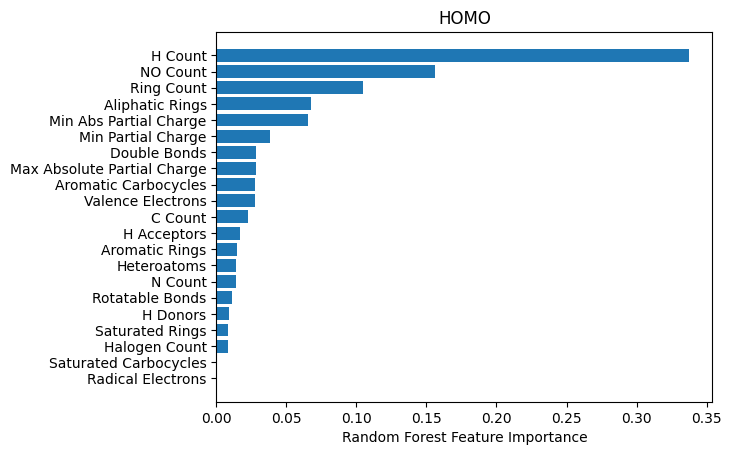

In [ ]:
data = pd.read_csv('NF_Descriptors.csv')
data = data.dropna()
y = data['HOMO_calc']
X = data.loc[:, ['Max Absolute Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'H Count',
         'C Count', 'N Count', 'Halogen Count', 'Double Bonds']]
list_numerical = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


rfr = RandomForestRegressor(random_state=42, max_depth=None, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("HOMO")

from sklearn.metrics import mean_squared_error

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

In [ ]:
r = permutation_importance(rfr, X_train, y_train,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{list_numerical[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

H Count 0.797 +/- 0.005
NO Count0.365 +/- 0.005
Ring Count0.347 +/- 0.005
Aliphatic Rings0.300 +/- 0.004
Min Abs Partial Charge0.126 +/- 0.002
Double Bonds0.088 +/- 0.002
Aromatic Carbocycles0.082 +/- 0.001
Min Partial Charge0.061 +/- 0.001
C Count 0.045 +/- 0.001
Valence Electrons0.039 +/- 0.001
H Acceptors0.033 +/- 0.001
Max Absolute Partial Charge0.032 +/- 0.000
Aromatic Rings0.024 +/- 0.001
Saturated Rings0.024 +/- 0.000
N Count 0.019 +/- 0.000
H Donors0.016 +/- 0.000
Heteroatoms0.015 +/- 0.000
Rotatable Bonds0.012 +/- 0.001
Halogen Count0.012 +/- 0.000


In [ ]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('NF_Descriptors.csv')
data = data.dropna()
y = data['HOMO_calc']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge','Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Heteroatoms', 'Rotatable Bonds', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              HOMO_calc   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.328e+05
Date:                Fri, 30 Jun 2023   Prob (F-statistic):                        0.00
Time:                        10:07:11   Log-Likelihood:                         -46206.
No. Observations:               41004   AIC:                                  9.245e+04
Df Residuals:                   40983   BIC:                                  9.263e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0724      0.004    -19.840      0.000      -0.080      -0.065
Heavy Atom Molecular Weight     0.0234      0.002      9.728      0.000       0.019       0.028
Max Absolute Partial Charge  -840.4259    139.307     -6.033      0.000   -1113.470    -567.382
Max Partial Charge            832.7733    139.306      5.978      0.000     559.730    1105.817
Min Abs Partial Charge       -838.5920    139.307     -6.020      0.000   -1111.636    -565.548
Min Partial Charge           -834.5849    139.306     -5.991      0.000   -1107.628    -561.542
Valence Electrons               0.3247      0.011     29.615      0.000       0.303       0.346
NHOH Count                      0.2650      0.019     13.731      0.000       0.227       0.303
NO Count                       -0.5947      0.022    -27.573      0.000      -0.637      -0.552
H Acceptors                     0.0967      0.008     12.388      0.000       0.081       0.112
H Donors                       -0.1622      0.024     -6.686      0.000      -0.210      -0.115
Ring Count                      0.2427      0.009     28.153      0.000       0.226       0.260
Aliphatic Rings                 0.1417      0.005     30.784      0.000       0.133       0.151
Aromatic Rings                  0.1011      0.007     13.989      0.000       0.087       0.115
Saturated Rings                -0.0440      0.006     -7.497      0.000      -0.056      -0.033
Aromatic Carbocycles            0.1048      0.007     15.543      0.000       0.092       0.118
Heteroatoms                    -0.6026      0.023    -26.741      0.000      -0.647      -0.558
Rotatable Bonds                 0.0636      0.006     10.026      0.000       0.051       0.076
Saturated Heterocycles         -0.0440      0.006     -7.497      0.000      -0.056      -0.033
H Count                        -0.0950      0.006    -15.901      0.000      -0.107      -0.083
C Count                        -0.9373      0.031    -30.346      0.000      -0.998      -0.877
N Count                        -0.0765      0.009     -8.650      0.000      -0.094      -0.059
F Count                        -0.3688      0.014    -27.011      0.000      -0.396      -0.342
Halogen Count                  -0.3688      0.014    -27.011      0.000      -0.396      -0.342
Double Bonds                    0.0751      0.005     16.621      0.000       0.066       0.084
Triple Bonds                    0.1889      0.012     16.370      0.000       0.166       0.212
==============================================================================
Omnibus:                     2291.139   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Ja

In [ ]:
param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(random_state=0)
grid_cv = GridSearchCV(rf, param_grid, scoring=score, n_jobs=-1, cv=cv).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))

Param for GS {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.918332597156694
Train AUC ROC Score for GS:  0.9637941580329916
Test AUC ROC Score for GS:  0.9196959911657362


Mean Absolute Error: 0.12 degrees.
R2:  0.9165452104558204
MSE:  0.029805753665112098
RMSE:  0.1726434292555384


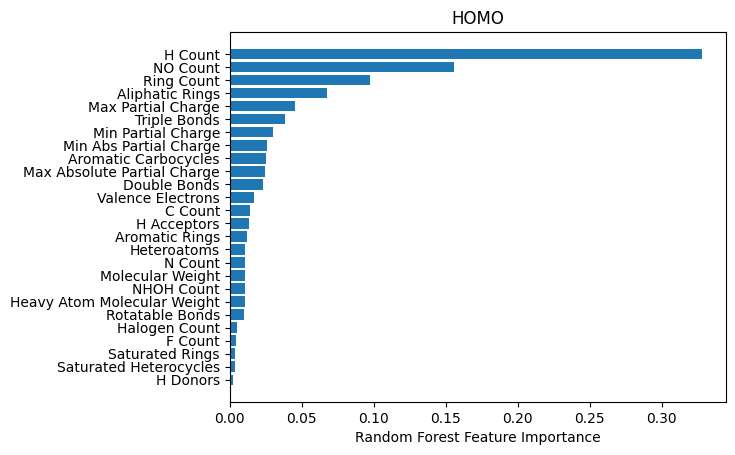

In [ ]:
rfr = RandomForestRegressor(random_state=42, max_depth=None, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("HOMO")

from sklearn.metrics import mean_squared_error

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

In [ ]:
r = permutation_importance(rfr, X_train, y_train,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{list_numerical[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

H Count 0.611 +/- 0.004
NO Count0.381 +/- 0.005
Aliphatic Rings0.311 +/- 0.004
Ring Count0.239 +/- 0.005
Triple Bonds0.114 +/- 0.002
Max Partial Charge0.087 +/- 0.001
Aromatic Carbocycles0.071 +/- 0.001
Double Bonds0.067 +/- 0.001
Min Partial Charge0.054 +/- 0.001
Min Abs Partial Charge0.036 +/- 0.001
Max Absolute Partial Charge0.028 +/- 0.001
H Acceptors0.024 +/- 0.001
C Count 0.022 +/- 0.001
Valence Electrons0.021 +/- 0.000
Aromatic Rings0.017 +/- 0.000
NHOH Count0.014 +/- 0.000
N Count 0.012 +/- 0.000
Rotatable Bonds0.011 +/- 0.001
Heteroatoms0.010 +/- 0.000
Molecular Weight0.009 +/- 0.000
Heavy Atom Molecular Weight0.008 +/- 0.000
Saturated Rings0.006 +/- 0.000
Saturated Heterocycles0.005 +/- 0.000
Halogen Count0.005 +/- 0.000
F Count 0.005 +/- 0.000
H Donors0.002 +/- 0.000


In [ ]:
data = pd.read_csv('NF_Descriptors.csv')
data = data.dropna()
y = data['HOMO_calc']
X = data.loc[:, ['Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Partial Charge','Valence Electrons', 'NO Count',
         'H Acceptors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Carbocycles',
        'Rotatable Bonds', 'H Count',
         'C Count', 'N Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              HOMO_calc   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          1.748e+05
Date:                Fri, 30 Jun 2023   Prob (F-statistic):                        0.00
Time:                        12:12:37   Log-Likelihood:                         -47451.
No. Observations:               41004   AIC:                                  9.493e+04
Df Residuals:                   40989   BIC:                                  9.506e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Max Absolute Partial Charge    -1.8460      0.187     -9.875      0.000      -2.212      -1.480
Max Partial Charge             -5.9185      0.083    -71.627      0.000      -6.080      -5.757
Min Partial Charge              3.5535      0.168     21.162      0.000       3.224       3.883
Valence Electrons              -0.0145      0.000    -31.027      0.000      -0.015      -0.014
NO Count                        0.1084      0.004     27.963      0.000       0.101       0.116
H Acceptors                     0.0358      0.005      6.693      0.000       0.025       0.046
Ring Count                     -0.0440      0.012     -3.779      0.000      -0.067      -0.021
Aliphatic Rings                 0.1642      0.008     20.727      0.000       0.149       0.180
Aromatic Carbocycles            0.1255      0.007     18.550      0.000       0.112       0.139
Rotatable Bonds                 0.0272      0.006      4.728      0.000       0.016       0.039
H Count                         0.0676      0.002     28.913      0.000       0.063       0.072
C Count                        -0.0237      0.006     -4.266      0.000      -0.035      -0.013
N Count                        -0.2554      0.003    -81.524      0.000      -0.262      -0.249
Double Bonds                   -0.0047      0.004     -1.177      0.239      -0.012       0.003
Triple Bonds                   -0.1005      0.009    -11.364      0.000      -0.118      -0.083
==============================================================================
Omnibus:                     2022.099   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7424.798
Skew:                          -0.078   Prob(JB):                         0.00
Kurtosis:                       5.079   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Mean Absolute Error: 0.12 degrees.
R2:  0.914412497210027
MSE:  0.030567449021240065
RMSE:  0.17483549130894466


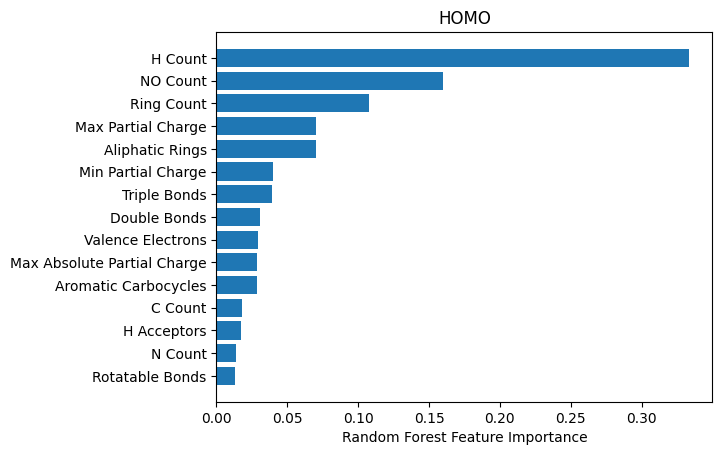

In [ ]:
rfr = RandomForestRegressor(random_state=42, max_depth=None, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("HOMO")

from sklearn.metrics import mean_squared_error

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

In [ ]:
r = permutation_importance(rfr, X_train, y_train,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{list_numerical[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

H Count 0.666 +/- 0.004
NO Count0.399 +/- 0.005
Aliphatic Rings0.301 +/- 0.004
Ring Count0.277 +/- 0.005
Max Partial Charge0.157 +/- 0.002
Triple Bonds0.111 +/- 0.002
Double Bonds0.103 +/- 0.002
Aromatic Carbocycles0.083 +/- 0.001
Min Partial Charge0.061 +/- 0.001
Valence Electrons0.043 +/- 0.000
Max Absolute Partial Charge0.034 +/- 0.000
C Count 0.029 +/- 0.001
H Acceptors0.028 +/- 0.001
N Count 0.017 +/- 0.000
Rotatable Bonds0.016 +/- 0.001


In [ ]:
data = pd.read_csv('NF_Descriptors.csv')
data = data.dropna()
y = data['HOMO_calc']
X = data.loc[:, ['Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Partial Charge','Valence Electrons', 'NO Count',
         'Ring Count', 'Aliphatic Rings', 'Aromatic Carbocycles',
         'H Count', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              HOMO_calc   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          2.140e+05
Date:                Fri, 30 Jun 2023   Prob (F-statistic):                        0.00
Time:                        12:18:51   Log-Likelihood:                         -51552.
No. Observations:               41004   AIC:                                  1.031e+05
Df Residuals:                   40994   BIC:                                  1.032e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Max Absolute Partial Charge    -5.0594      0.201    -25.178      0.000      -5.453      -4.666
Max Partial Charge             -4.9971      0.087    -57.157      0.000      -5.168      -4.826
Min Partial Charge             -1.1823      0.175     -6.767      0.000      -1.525      -0.840
Valence Electrons              -0.0135      0.000    -50.261      0.000      -0.014      -0.013
NO Count                       -0.0599      0.002    -32.694      0.000      -0.063      -0.056
Ring Count                     -0.1714      0.005    -35.261      0.000      -0.181      -0.162
Aliphatic Rings                 0.2645      0.004     64.343      0.000       0.256       0.273
Aromatic Carbocycles            0.0921      0.004     21.266      0.000       0.084       0.101
H Count                         0.0426      0.001     35.759      0.000       0.040       0.045
Triple Bonds                   -0.2462      0.004    -63.493      0.000      -0.254      -0.239
==============================================================================
Omnibus:                     1856.318   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5209.049
Skew:                          -0.207   Prob(JB):                         0.00
Kurtosis:                       4.696   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Mean Absolute Error: 0.12 degrees.
R2:  0.9072697071889484
MSE:  0.033118485828267034
RMSE:  0.18198485054604693


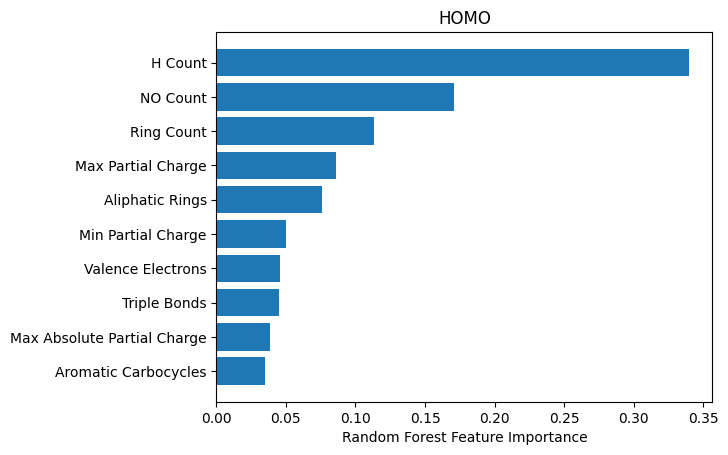

In [ ]:
rfr = RandomForestRegressor(random_state=42, max_depth=None, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("HOMO")

from sklearn.metrics import mean_squared_error

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

In [ ]:
r = permutation_importance(rfr, X_train, y_train,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{list_numerical[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

H Count 0.646 +/- 0.004
NO Count0.448 +/- 0.005
Ring Count0.309 +/- 0.006
Aliphatic Rings0.306 +/- 0.004
Max Partial Charge0.185 +/- 0.002
Triple Bonds0.128 +/- 0.002
Aromatic Carbocycles0.112 +/- 0.001
Valence Electrons0.081 +/- 0.001
Min Partial Charge0.077 +/- 0.001
Max Absolute Partial Charge0.050 +/- 0.001


In [ ]:
data = pd.read_csv('NF_Descriptors.csv')
data = data.dropna()
y = data['HOMO_calc']
X = data.loc[:, ['Max Absolute Partial Charge', 'NO Count',
         'Ring Count', 'Aliphatic Rings', 'Aromatic Carbocycles',
         'H Count', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              HOMO_calc   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                          2.282e+05
Date:                Mon, 03 Jul 2023   Prob (F-statistic):                        0.00
Time:                        15:28:21   Log-Likelihood:                         -57411.
No. Observations:               41004   AIC:                                  1.148e+05
Df Residuals:                   40997   BIC:                                  1.149e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Max Absolute Partial Charge    -7.2464      0.043   -167.727      0.000      -7.331      -7.162
NO Count                       -0.1760      0.002   -104.562      0.000      -0.179      -0.173
Ring Count                     -0.3409      0.004    -94.608      0.000      -0.348      -0.334
Aliphatic Rings                 0.2794      0.005     60.223      0.000       0.270       0.289
Aromatic Carbocycles            0.0373      0.005      7.543      0.000       0.028       0.047
H Count                         0.0239      0.001     20.381      0.000       0.022       0.026
Triple Bonds                   -0.3006      0.004    -79.830      0.000      -0.308      -0.293
==============================================================================
Omnibus:                     1615.696   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2417.971
Skew:                          -0.377   Prob(JB):                         0.00
Kurtosis:                       3.920   Cond. No.                         160.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(random_state=0)
grid_cv = GridSearchCV(rf, param_grid, scoring=score, n_jobs=-1, cv=cv).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))

Param for GS {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.9077238472049094
Train AUC ROC Score for GS:  0.9543609556606569
Test AUC ROC Score for GS:  0.9083896345261895


Mean Absolute Error: 0.13 degrees.
R2:  0.8951633879028897
MSE:  0.03744223971228394
RMSE:  0.19349997341675254


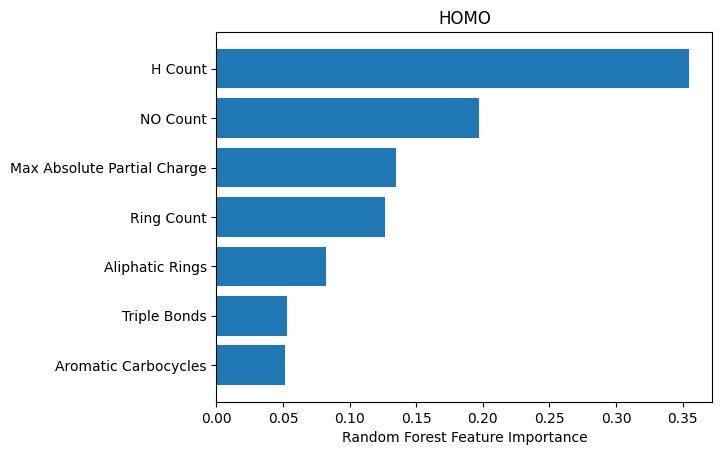

In [ ]:
rfr = RandomForestRegressor(random_state=42, max_depth=None, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("HOMO")

from sklearn.metrics import mean_squared_error

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

In [ ]:
r = permutation_importance(rfr, X_train, y_train,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{list_numerical[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

H Count 0.745 +/- 0.005
NO Count0.634 +/- 0.005
Ring Count0.353 +/- 0.005
Aliphatic Rings0.304 +/- 0.005
Max Absolute Partial Charge0.234 +/- 0.002
Aromatic Carbocycles0.212 +/- 0.002
Triple Bonds0.159 +/- 0.002


In [ ]:
data = pd.read_csv('NF_Descriptors.csv')
data = data.dropna()
y = data['HOMO_calc']
X = data.loc[:, ['Max Absolute Partial Charge', 'NO Count',
         'Ring Count', 'Aliphatic Rings', 'Aromatic Carbocycles',
         'H Count']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              HOMO_calc   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                          2.295e+05
Date:                Fri, 30 Jun 2023   Prob (F-statistic):                        0.00
Time:                        12:27:07   Log-Likelihood:                         -60373.
No. Observations:               41004   AIC:                                  1.208e+05
Df Residuals:                   40998   BIC:                                  1.208e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Max Absolute Partial Charge    -7.4719      0.046   -161.238      0.000      -7.563      -7.381
NO Count                       -0.2016      0.002   -113.489      0.000      -0.205      -0.198
Ring Count                     -0.3542      0.004    -91.529      0.000      -0.362      -0.347
Aliphatic Rings                 0.2434      0.005     49.032      0.000       0.234       0.253
Aromatic Carbocycles            0.0080      0.005      1.508      0.132      -0.002       0.018
H Count                         0.0415      0.001     33.495      0.000       0.039       0.044
==============================================================================
Omnibus:                     1642.198   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2112.779
Skew:                          -0.431   Prob(JB):                         0.00
Kurtosis:                       3.702   Cond. No.                         160.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
data = pd.read_csv('NF_Descriptors.csv')
data = data.dropna()
y = data['HOMO_calc']
X = data.loc[:, ['Max Absolute Partial Charge', 'NO Count',
         'Ring Count', 'Aliphatic Rings', 
         'H Count']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              HOMO_calc   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                          2.754e+05
Date:                Fri, 30 Jun 2023   Prob (F-statistic):                        0.00
Time:                        12:27:20   Log-Likelihood:                         -60375.
No. Observations:               41004   AIC:                                  1.208e+05
Df Residuals:                   40999   BIC:                                  1.208e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Max Absolute Partial Charge    -7.4864      0.045   -165.153      0.000      -7.575      -7.398
NO Count                       -0.2023      0.002   -117.635      0.000      -0.206      -0.199
Ring Count                     -0.3512      0.003   -105.253      0.000      -0.358      -0.345
Aliphatic Rings                 0.2416      0.005     50.036      0.000       0.232       0.251
H Count                         0.0420      0.001     34.804      0.000       0.040       0.044
==============================================================================
Omnibus:                     1639.953   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2108.303
Skew:                          -0.431   Prob(JB):                         0.00
Kurtosis:                       3.700   Cond. No.                         156.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Mean Absolute Error: 0.16 degrees.
R2:  0.8466848695834046
MSE:  0.05475627025471639
RMSE:  0.23400057746663017


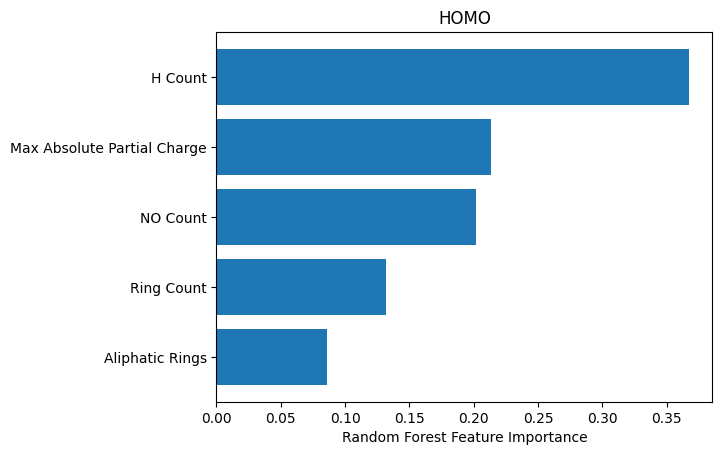

In [ ]:
rfr = RandomForestRegressor(random_state=42, max_depth=None, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("HOMO")

from sklearn.metrics import mean_squared_error

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [ ]:
data = pd.read_csv('NF_Descriptors.csv')
data = data.dropna()
y = data['LUMO_calc']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression

rfr = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(rfr,
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/V

In [ ]:
from sklearn.linear_model import LinearRegression

rfr = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(rfr,
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/V